In [1]:
from pandas import Series, DataFrame
from matplotlib import pyplot
from pandas.tools.plotting import lag_plot
from pandas import concat
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
%matplotlib inline

Month
1948-01-01    1511
1948-02-01    1694
1948-03-01    1614
1948-04-01    1482
1948-05-01    1245
Name: Monthly U.S. male (20 years and over) unemployment figures (10**3) 1948-1981, dtype: int64


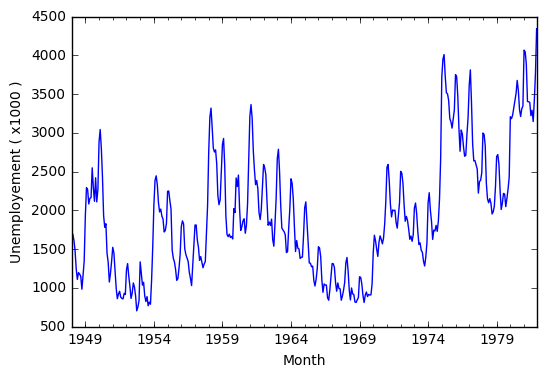

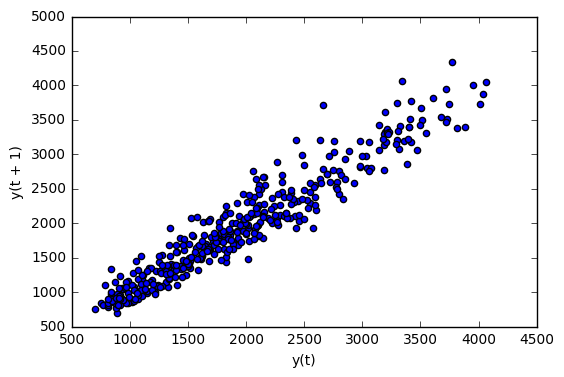

In [3]:
series = Series.from_csv('monthly-us-male-20-years-and-ove.csv', header=0)
print(series.head())
series=series.astype(float)

series.plot()
pyplot.ylabel('Unemployement ( x1000 )')
pyplot.show()

lag_plot(series)
pyplot.show()

In [4]:
values = DataFrame(series.values)
# print(values)
dataframe = concat([values.shift(6),values.shift(5),values.shift(4),values.shift(3),values.shift(2),values.shift(1), values], axis=1)
dataframe.columns = ['t-6','t-5','t-4','t-3','t-2','t-1', 't']
print(dataframe)
result = dataframe.corr()
print(result)

        t-6     t-5     t-4     t-3     t-2     t-1       t
0       NaN     NaN     NaN     NaN     NaN     NaN  1511.0
1       NaN     NaN     NaN     NaN     NaN  1511.0  1694.0
2       NaN     NaN     NaN     NaN  1511.0  1694.0  1614.0
3       NaN     NaN     NaN  1511.0  1694.0  1614.0  1482.0
4       NaN     NaN  1511.0  1694.0  1614.0  1482.0  1245.0
5       NaN  1511.0  1694.0  1614.0  1482.0  1245.0  1108.0
6    1511.0  1694.0  1614.0  1482.0  1245.0  1108.0  1195.0
7    1694.0  1614.0  1482.0  1245.0  1108.0  1195.0  1177.0
8    1614.0  1482.0  1245.0  1108.0  1195.0  1177.0  1146.0
9    1482.0  1245.0  1108.0  1195.0  1177.0  1146.0   981.0
10   1245.0  1108.0  1195.0  1177.0  1146.0   981.0  1163.0
11   1108.0  1195.0  1177.0  1146.0   981.0  1163.0  1344.0
12   1195.0  1177.0  1146.0   981.0  1163.0  1344.0  1923.0
13   1177.0  1146.0   981.0  1163.0  1344.0  1923.0  2292.0
14   1146.0   981.0  1163.0  1344.0  1923.0  2292.0  2267.0
15    981.0  1163.0  1344.0  1923.0  229

predicted=1347.205914, expected=1343.000000
predicted=1312.054634, expected=1281.000000
predicted=1297.027277, expected=1396.000000
predicted=1568.374652, expected=1582.000000
predicted=1830.847382, expected=2094.000000
predicted=2233.020539, expected=2226.000000
predicted=2186.825606, expected=2003.000000
predicted=1766.243533, expected=1855.000000
predicted=1690.973245, expected=1624.000000
predicted=1611.110533, expected=1744.000000
predicted=1739.550560, expected=1733.000000
predicted=1704.533561, expected=1805.000000
predicted=1690.856113, expected=1728.000000
predicted=1662.188327, expected=1863.000000
predicted=1975.808133, expected=2146.000000
predicted=2412.515654, expected=2665.000000
predicted=3040.721949, expected=3719.000000
predicted=3904.629885, expected=3950.000000
predicted=3866.737096, expected=4009.000000
predicted=3682.622134, expected=3731.000000
predicted=3429.845707, expected=3518.000000
predicted=3423.362852, expected=3501.000000
predicted=3349.097496, expected=

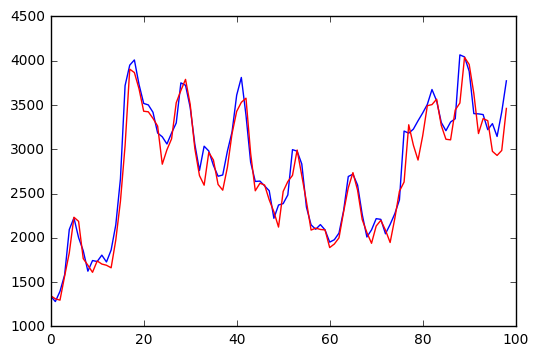

In [16]:
8from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
series = Series.from_csv('monthly-us-male-20-years-and-ove.csv', header=0)
# split dataset
X = series.values
train, test = X[6:len(X)-100], X[len(X)-100:-1]
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

0 , predicted=1641.564814, expected=1484.000000
1 , predicted=1471.457472, expected=1457.000000
2 , predicted=1425.260089, expected=1343.000000
3 , predicted=1315.911829, expected=1281.000000
4 , predicted=1299.819644, expected=1396.000000
5 , predicted=1471.670544, expected=1582.000000
6 , predicted=1717.627768, expected=2094.000000
7 , predicted=2306.323372, expected=2226.000000
8 , predicted=2223.472662, expected=2003.000000
9 , predicted=1733.978981, expected=1855.000000
10 , predicted=1712.778258, expected=1624.000000
11 , predicted=1651.342856, expected=1744.000000
12 , predicted=1824.613178, expected=1733.000000
13 , predicted=1744.214582, expected=1805.000000
14 , predicted=1831.230658, expected=1728.000000
15 , predicted=1653.697676, expected=1863.000000
16 , predicted=1976.837385, expected=2146.000000
17 , predicted=2286.871351, expected=2665.000000
18 , predicted=2914.246655, expected=3719.000000
19 , predicted=4162.273027, expected=3950.000000
20 , predicted=3916.348282, ex

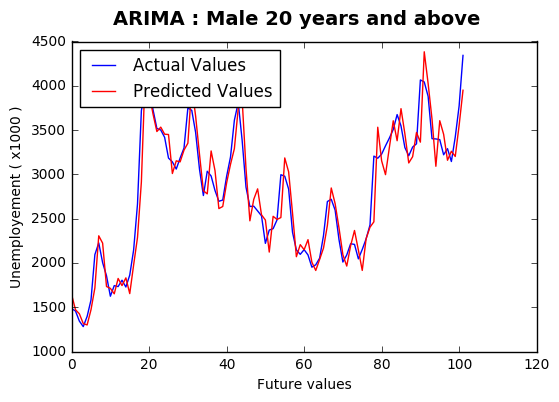

In [110]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

def parser(x):
    return datetime.strptime(x, '%Y-%m')

series = read_csv('monthly-us-male-20-years-and-ove.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# series = (series - series.mean()) #/ (series.max() - series.min())

X = series.values
X = np.asarray(X, dtype=float)
# X = X[6:-1]
# print X
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()


for t in range(len(test)):
    model = ARIMA(history, order=(6,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('%i , predicted=%f, expected=%f' % (t, yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % np.sqrt(error))
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.suptitle('ARIMA : Male 20 years and above', fontsize=14, fontweight='bold')
# pyplot.set_title('ARIMA')

pyplot.ylabel('Unemployement ( x1000 )')
pyplot.xlabel('Future values')

pyplot.legend(['Actual Values', 'Predicted Values'], loc='upper left')
pyplot.show()

(298, 6) (99, 6) (298,) (99,)
270.154809697
554.255127922


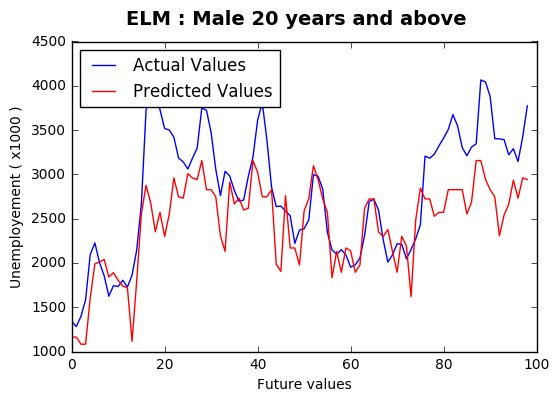

In [17]:
import numpy as np
from pandas import Series, DataFrame
from pandas import datetime
from pandas import read_csv
from matplotlib import pyplot
from pandas.tools.plotting import lag_plot
from pandas import concat
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
%matplotlib inline


def parser(x):
    return datetime.strptime(x, '%Y-%m')

series = read_csv('monthly-us-male-20-years-and-ove.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
mean_xyz = series.mean()
series = (series - series.mean()) #/ (series.max() - series.min())

values = DataFrame(series.values)

series=series.astype(float)
# np.random.seed(131237)
np.random.seed(131)


dataframe = concat([values.shift(6),values.shift(5),values.shift(4),values.shift(3),values.shift(2),values.shift(1), values], axis=1)
dataframe.columns = ['t-6','t-5','t-4','t-3','t-2','t-1', 't']
data = np.array(dataframe.values, dtype=float)
data=data[10:]

# print data[0][-1]
# print(data)
X_train=data[:int(data.shape[0]*0.75),:-1]
Y_train=data[:int(data.shape[0]*0.75),-1] 
X_test=data[int(data.shape[0]*0.75):-1,:-1]
Y_test=data[int(data.shape[0]*0.75):-1,-1] 

print X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

from hpelm import ELM

elm = ELM(X_train.shape[1], 1)
elm.add_neurons(20, "sigm")
elm.add_neurons(15, "sigm")
elm.add_neurons(5, "sigm")

elm.train(X_train, Y_train, "LOO","OP","r")
# Yunseenpredict = elm.predict(Xunseen)

Y_predict = elm.predict(X_test)
Y_trainpredict = elm.predict(X_train)

print np.sqrt(elm.error(Y_trainpredict,Y_train))
print np.sqrt(elm.error(Y_predict,Y_test))

pyplot.plot(Y_test+mean_xyz)
pyplot.plot(Y_predict+mean_xyz, color='red')
pyplot.suptitle('ELM : Male 20 years and above', fontsize=14, fontweight='bold')
# pyplot.set_title('ARIMA')

pyplot.ylabel('Unemployement ( x1000 )')
pyplot.xlabel('Future values')

pyplot.legend(['Actual Values', 'Predicted Values'], loc='upper left')
pyplot.show()
# ExtraPolX = Xunseen[0,:]

# ExtraPolX = ExtraPolX.reshape(1,numfeatures)
# print ExtraPolX.shape
# ExtraPolY = []
# for i in range(Xunseen.shape[0]):
#     temporary = elm.predict(ExtraPolX)
#     ExtraPolY.append(float(temporary))
#     for j in range(numfeatures-1):
#         ExtraPolX[0,j] = ExtraPolX[0,j+1]
#     ExtraPolX[0,numfeatures-1] = float(temporary)

# ExtraPolY = np.asarray(ExtraPolY)

[ 1511.  1694.  1614.  1482.  1245.  1108.  1195.]
(301, 6) (101, 6) (301,) (101,)
173.48159564
239.696483757


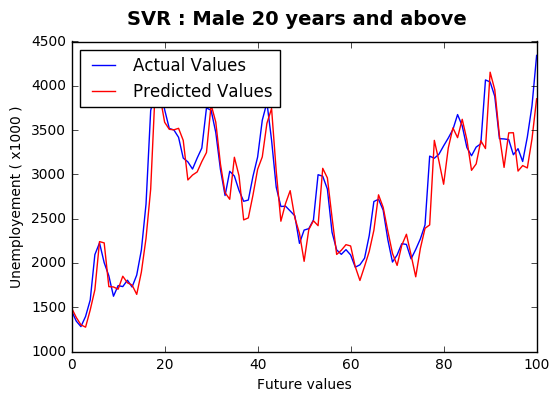

In [5]:
import numpy as np

from matplotlib import pyplot
from pandas.tools.plotting import lag_plot
from pandas import concat
from sklearn.metrics import mean_squared_error
from pandas import Series, DataFrame
series = Series.from_csv('monthly-us-male-20-years-and-ove.csv', header=0)
values = DataFrame(series.values)
series=series.astype(float)
np.random.seed(131237)

# print(values)
dataframe = concat([values.shift(6),values.shift(5),values.shift(4),values.shift(3),values.shift(2),values.shift(1), values], axis=1)
dataframe.columns = ['t-6','t-5','t-4','t-3','t-2','t-1', 't']
data = np.array(dataframe.values)
data=data[6:]

# print data[0][-1]
print(data[0])
X_train=data[:int(data.shape[0]*0.75),:-1]
Y_train=data[:int(data.shape[0]*0.75),-1] 
X_test=data[int(data.shape[0]*0.75):,:-1]
Y_test=data[int(data.shape[0]*0.75):,-1] 

print X_train.shape,X_test.shape, Y_train.shape, Y_test.shape


from sklearn.svm import SVR
model = SVR(
            C=10.0,
            epsilon=1.005,
            kernel='linear',
)
model.fit(X_train,Y_train)
Y_predict = model.predict(X_test)
Y_trainpredict = model.predict(X_train)

print np.sqrt(mean_squared_error(Y_train,Y_trainpredict))
print np.sqrt(mean_squared_error(Y_test,Y_predict))
pyplot.plot(Y_test)
pyplot.plot(Y_predict, color='red')
pyplot.suptitle('SVR : Male 20 years and above', fontsize=14, fontweight='bold')
# pyplot.set_title('ARIMA')

pyplot.ylabel('Unemployement ( x1000 )')
pyplot.xlabel('Future values')

pyplot.legend(['Actual Values', 'Predicted Values'], loc='upper left')
pyplot.show()
# Yunseenpredict = model.predict(Xunseen)

# ExtraPolX = Xunseen[0,:]
# ExtraPolX = ExtraPolX.reshape(1,numfeatures)
# print ExtraPolX.shape
# ExtraPolY = []
# for i in range(Xunseen.shape[0]):
#     temporary = model.predict(ExtraPolX)
#     ExtraPolY.append(float(temporary))
#     for j in range(numfeatures-1):
#         ExtraPolX[0,j] = ExtraPolX[0,j+1]
#     ExtraPolX[0,numfeatures-1] = float(temporary)

# ExtraPolY = np.asarray(ExtraPolY)

In [26]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = read_csv('monthly-us-male-20-years-and-ove.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values

print((dataset.dtype))
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
print(dataset.dtype)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(6, input_shape=(1, look_back), return_sequences=False))
model.add(LSTM(6, input_shape=(1, look_back), return_sequences=False))

model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
print testPredict.shape, trainY.shape
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = (mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f MSE' % (trainScore))
testScore = (mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f MSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

int64
float32


ValueError: Input 0 is incompatible with layer lstm_16: expected ndim=3, found ndim=2

[ 1694.  1614.  1482.  1245.  1108.  1195.  1177.]
Train on 300 samples, validate on 101 samples

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:39: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, kernel_initializer="uniform", input_shape=(6,))`
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:42: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, kernel_initializer="uniform")`
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:46: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`



Epoch 1/45
300/300 [==============================] - 0s - loss: 1845954.3349 - val_loss: 957166.9610
Epoch 2/45
300/300 [==============================] - 0s - loss: 246325.9336 - val_loss: 275969.4558
Epoch 3/45
300/300 [==============================] - 0s - loss: 230668.3775 - val_loss: 248183.8434
Epoch 4/45
300/300 [==============================] - 0s - loss: 211006.5949 - val_loss: 227237.3612
Epoch 5/45
300/300 [==============================] - 0s - loss: 196193.4060 - val_loss: 199855.2614
Epoch 6/45
300/300 [==============================] - 0s - loss: 222689.2432 - val_loss: 183521.3049
Epoch 7/45
300/300 [==============================] - 0s - loss: 199998.0531 - val_loss

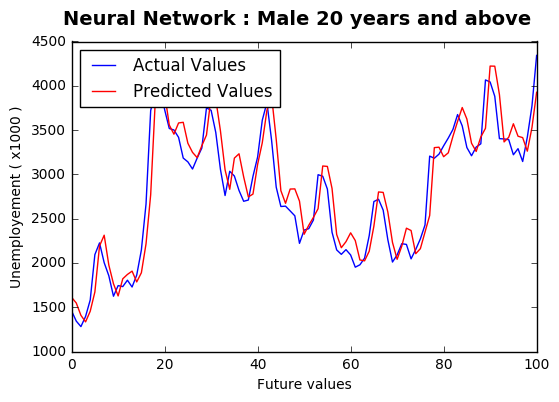

In [11]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from pandas import concat
from pandas import Series, DataFrame
from pandas import read_csv
from pandas import datetime
import numpy as np
import numpy as np

from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
def parser(x):
    return datetime.strptime(x, '%Y-%m')

series = read_csv('monthly-us-male-20-years-and-ove.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# series = (series - series.mean()) #/ (series.max() - series.min())

values = DataFrame(series.values)

series=series.astype(float)
np.random.seed(131237)

# print(values)
dataframe = concat([values.shift(6),values.shift(5),values.shift(4),values.shift(3),values.shift(2),values.shift(1), values], axis=1)
dataframe.columns = ['t-6','t-5','t-4','t-3','t-2','t-1', 't']
data = np.array(dataframe.values)
data=data[7:]

# print data[0][-1]
print(data[0])
X_train=data[:int(data.shape[0]*0.75),:-1]
Y_train=data[:int(data.shape[0]*0.75),-1] 
X_test=data[int(data.shape[0]*0.75):,:-1]
Y_test=data[int(data.shape[0]*0.75):,-1] 


model = Sequential()
# 2 inputs, 10 neurons in 1 hidden layer, with tanh activation and dropout
model.add(Dense(128, init='uniform', input_shape=(X_train.shape[1],))) 
model.add(Activation('relu'))

model.add(Dense(32, init='uniform')) 
model.add(Activation('relu'))
model.add(Dropout(0.2))
# 1 output, linear activation
model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))
model.compile(loss='mse', optimizer='rmsprop')

model.fit(X_train, Y_train,
          nb_epoch=45, batch_size=10,
          validation_data=(X_test, Y_test))
Y_predict = model.predict(X_test)
Y_trainpredict = model.predict(X_train)

print np.sqrt(mean_squared_error(Y_train,Y_trainpredict))
print np.sqrt(mean_squared_error(Y_test,Y_predict))
pyplot.plot(Y_test)
pyplot.plot(Y_predict, color='red')
pyplot.suptitle('Neural Network : Male 20 years and above', fontsize=14, fontweight='bold')
# pyplot.set_title('ARIMA')

pyplot.ylabel('Unemployement ( x1000 )')
pyplot.xlabel('Future values')

pyplot.legend(['Actual Values', 'Predicted Values'], loc='upper left')
pyplot.show()
# model.predict(X_train)